# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p> The CLT does apply here. There are more than 30 samples, so a z-test is most appropriate. The null hypothesis is there is no difference in the rates of calls received by black sounding and white sounding names. The alternate hypothesis is the rate of calls for black sounding names is lower than white sounding names.</p>
</div>

In [5]:
# Frequentist technique
w = data[data.race=='w']
b = data[data.race=='b']

In [6]:
p_w = w.call.mean()
p_b = b.call.mean()
xbar = p_b - p_w

In [7]:
# Standard Error
var_w = p_w*(1-p_w)
var_b = p_b*(1-p_b)
se = np.sqrt(var_w/len(w) + var_b/len(b))
print('Standard Error: %.3f' % se)

Standard Error: 0.008


In [8]:
# Margin of Error
me = 1.96*se
print('Margin of Error: %.3f' % me)

Margin of Error: 0.015


In [9]:
# Confidence Interval
upper = xbar + 1.96*se
lower = xbar - 1.96*se
print('CI: [%.3f, %.3f]'% (lower, upper))

CI: [-0.047, -0.017]


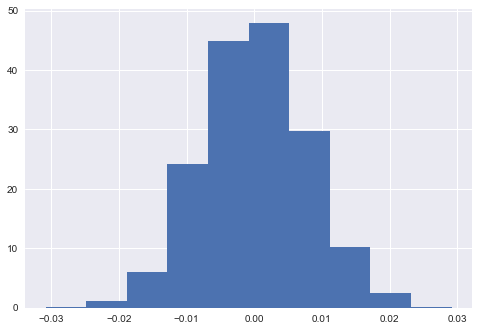

In [10]:
# Your solution to Q3 here
# Bootstrap technique
bstrap = np.empty(10000)
for i in range(10000):
    sample_b = np.random.choice(data.call, 2435)
    sample_w = np.random.choice(data.call, 2435)
    bstrap[i] = sample_b.mean() - sample_w.mean()

sns.set()
_ = plt.hist(bstrap, bins=10, normed=True)
plt.show()

In [11]:
bs_mean = bstrap.mean()
bs_se = bstrap.std()


In [12]:
# calculate how many standard deviations black_mean is from bs_mean
z =(xbar - bs_mean) / bs_se
z

-4.1387270810832328

In [13]:
margin_of_error = bs_se * -z
print('Margin of Error =', margin_of_error)

Margin of Error = 0.032113552998


In [14]:
# Calculated Confidence Interval
alpha = 0.05
upper_lim = bs_mean + 1.96*bs_se
lower_lim = bs_mean - 1.96*bs_se
print('Confidence Interval is %.4f to %.4f' % (lower_lim, upper_lim))

Confidence Interval is -0.0151 to 0.0153


In [15]:
# Confidence Interval taken from boostrap sample
bs_sorted = sorted(bstrap)
print('Confidence Interval is %.4f to %.4f' % (bs_sorted[249], bs_sorted[9749]))


Confidence Interval is -0.0148 to 0.0156


In [16]:
p = stats.norm.cdf(z)
p

1.7461904766212401e-05

In [17]:
# Calculate p-value using bootstrap sample
p = (sum(bstrap < xbar) / len(bstrap))
p

0.0

<div class="span5 alert alert-success">
<p> The sound of a person's name does have an impact on their ability to receive calls from employers. The p-values calculated through bootstrapping and frequentist methods are well under the predetermined alpha value of 0.05. </p>
</div>